In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

## Forecasting a Time Series

In the first two examples there
is a single value per time step, so these are univariate time series, while in the financial
example there are multiple values per time step (e.g., the company’s revenue, debt,
and so on), so it is a multivariate time series.

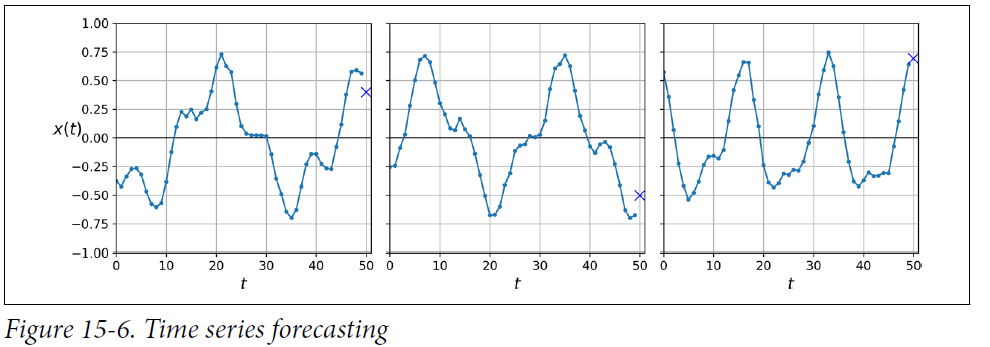

#### Time series generated by the generate_time_series() function
This function creates as many time series as requested (via the batch_size argument),
each of length n_steps, and there is just one value per time step in each series
(i.e., all series are univariate)

In [11]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
    return series[..., np.newaxis].astype(np.float32)

Now let’s create a training set, a validation set, and a test set using this function:

In [12]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

### Baseline Metrics
This is called naive forecasting, and it is sometimes surprisingly difficult to
outperform. In this case, it gives us a mean squared error of about 0.020:

In [13]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020889254

Another simple approach is to use a fully connected network. Since it expects a flat
list of features for each input, we need to add a Flatten layer.

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
    ])

In [15]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), 
              optimizer="adam",
              metrics=["accuracy"])

In [16]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 77us/sample - loss: 0.1062 - accuracy: 0.0000e+00 - val_loss: 0.0450 - val_accuracy: 0.0000e+00
Epoch 2/20
7000/7000 [==============================] - 0s 41us/sample - loss: 0.0291 - accuracy: 0.0000e+00 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 3/20
7000/7000 [==============================] - 0s 38us/sample - loss: 0.0163 - accuracy: 0.0000e+00 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 4/20
7000/7000 [==============================] - 0s 33us/sample - loss: 0.0118 - accuracy: 0.0000e+00 - val_loss: 0.0110 - val_accuracy: 0.0000e+00
Epoch 5/20
7000/7000 [==============================] - 0s 36us/sample - loss: 0.0098 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 6/20
7000/7000 [==============================] - 0s 32us/sample - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 7/20
7000/7000 [

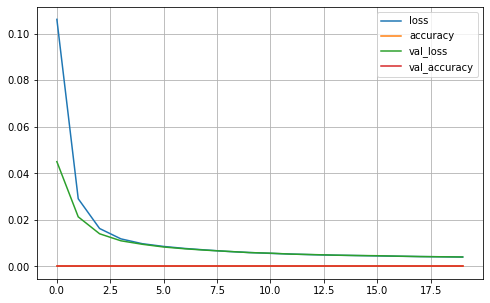

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1) 

## Implementing a Simple RNN
It just contains a single layer, with a single
neuron, as we saw in Figure 15-1. We do not need to specify the length of the
input sequences (unlike in the previous model), since a recurrent neural network can
process any number of time steps (this is why we set the first input dimension to
None). By default, the SimpleRNN layer uses the hyperbolic tangent activation function.
It works exactly as we saw earlier: the initial state h(init) is set to 0, and it is passed
to a single recurrent neuron, along with the value of the first time step, x(0). The neuron
computes a weighted sum of these values and applies the hyperbolic tangent activation
function to the result, and this gives the first output, y0.

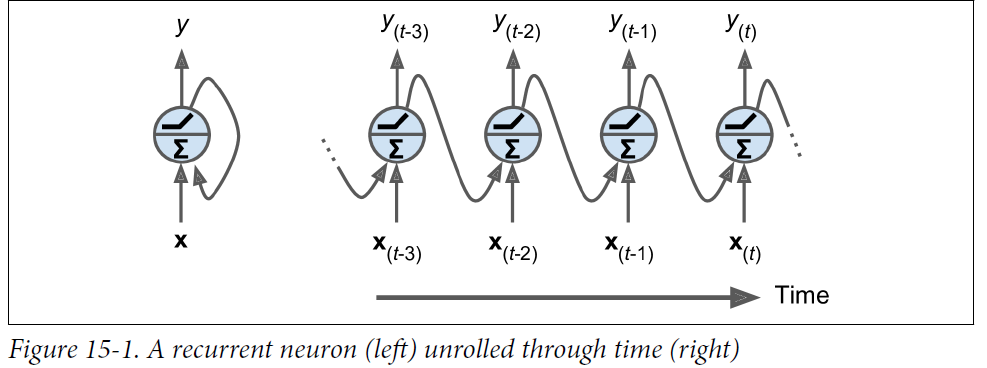

In [19]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
    ])

In [20]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), 
              optimizer="adam",
              metrics=["accuracy"])

In [21]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 3s 426us/sample - loss: 1.0262 - accuracy: 0.0000e+00 - val_loss: 0.9570 - val_accuracy: 0.0000e+00
Epoch 2/20
7000/7000 [==============================] - 2s 331us/sample - loss: 0.8658 - accuracy: 0.0000e+00 - val_loss: 0.7651 - val_accuracy: 0.0000e+00
Epoch 3/20
7000/7000 [==============================] - 2s 304us/sample - loss: 0.7436 - accuracy: 0.0000e+00 - val_loss: 0.7002 - val_accuracy: 0.0000e+00
Epoch 4/20
7000/7000 [==============================] - 2s 306us/sample - loss: 0.6315 - accuracy: 0.0000e+00 - val_loss: 0.4614 - val_accuracy: 0.0000e+00
Epoch 5/20
7000/7000 [==============================] - 2s 295us/sample - loss: 0.4177 - accuracy: 0.0000e+00 - val_loss: 0.3711 - val_accuracy: 0.0000e+00
Epoch 6/20
7000/7000 [==============================] - 2s 322us/sample - loss: 0.3312 - accuracy: 0.0000e+00 - val_loss: 0.2835 - val_accuracy: 0.0000e+00
Epoch 7/20
7000/

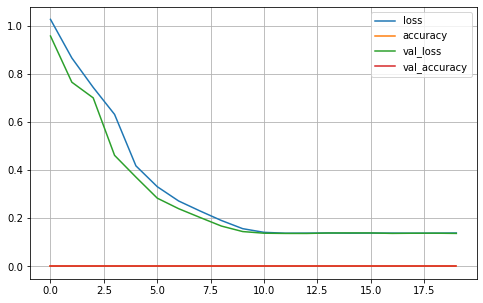

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1) 

# Deep RNNs
It is quite common to stack multiple layers of cells, as shown in Figure 15-7. This
gives you a deep RNN.

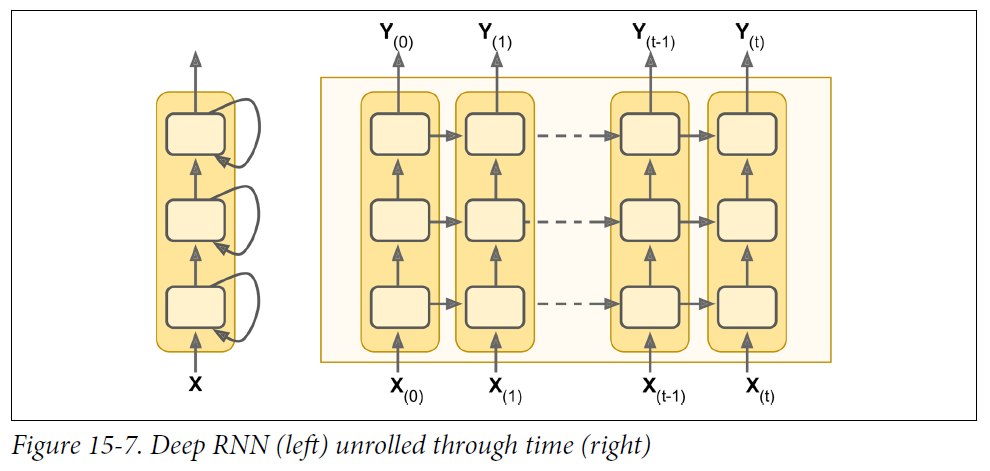

Implementing a deep RNN with tf.keras is quite simple: just stack recurrent layers. In
this example, we use three SimpleRNN layers (but we could add any other type of
recurrent layer, such as an LSTM layer or a GRU layer, which we will discuss shortly):

In [23]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
    ])

In [24]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), 
              optimizer="adam",
              metrics=["accuracy"])

In [25]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0953 - accuracy: 0.0000e+00 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 2/20
7000/7000 [==============================] - 6s 893us/sample - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 3/20
7000/7000 [==============================] - 6s 870us/sample - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 4/20
7000/7000 [==============================] - 6s 872us/sample - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 5/20
7000/7000 [==============================] - 7s 949us/sample - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 6/20
7000/7000 [==============================] - 7s 964us/sample - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 7/20
7000/70

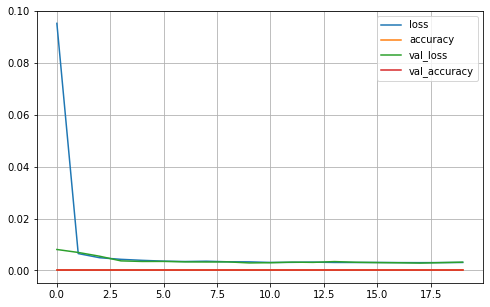

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1) 

it might be preferable to replace the output layer with a Dense layer

In [31]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1], activation="relu"),
    keras.layers.SimpleRNN(20, activation="relu"),
    keras.layers.Dense(1, activation="relu")
    ])

In [32]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), 
              optimizer="adam",
              metrics=["accuracy"])

In [33]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 5s 759us/sample - loss: 0.0713 - accuracy: 0.0000e+00 - val_loss: 0.0651 - val_accuracy: 0.0000e+00
Epoch 2/20
7000/7000 [==============================] - 4s 574us/sample - loss: 0.0647 - accuracy: 0.0000e+00 - val_loss: 0.0643 - val_accuracy: 0.0000e+00
Epoch 3/20
7000/7000 [==============================] - 4s 596us/sample - loss: 0.0643 - accuracy: 0.0000e+00 - val_loss: 0.0642 - val_accuracy: 0.0000e+00
Epoch 4/20
7000/7000 [==============================] - 4s 581us/sample - loss: 0.0641 - accuracy: 0.0000e+00 - val_loss: 0.0642 - val_accuracy: 0.0000e+00
Epoch 5/20
7000/7000 [==============================] - 4s 579us/sample - loss: 0.0640 - accuracy: 0.0000e+00 - val_loss: 0.0638 - val_accuracy: 0.0000e+00
Epoch 6/20
7000/7000 [==============================] - 4s 584us/sample - loss: 0.0640 - accuracy: 0.0000e+00 - val_loss: 0.0642 - val_accuracy: 0.0000e+00
Epoch 7/20
7000/

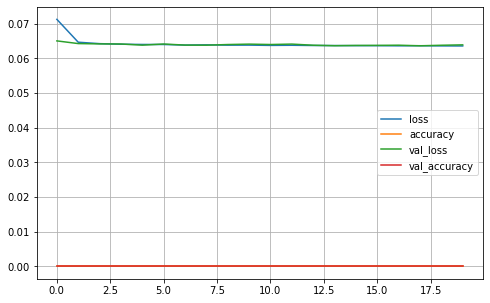

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)

## Forecasting Several Time Steps Ahead
But what if we want to predict the next 10 values?

In [36]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    print(y_pred_one)
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

[[[0.5095845]]]
[[[0.3696862]]]
[[[0.19926894]]]
[[[0.01862201]]]
[[[0.]]]
[[[0.]]]
[[[0.]]]
[[[0.]]]
[[[0.]]]
[[[0.]]]


As you might expect, the prediction for the next step will usually be more accurate
than the predictions for later time steps, since the errors might accumulate (as you
can see in Figure 15-8).

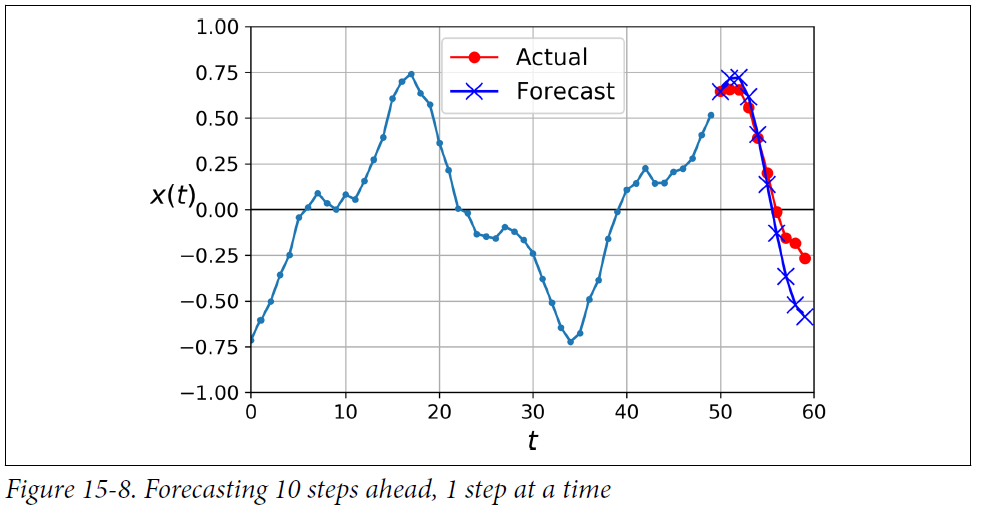

The second option is to train an RNN to predict all 10 next values at once. We can
still use a sequence-to-vector model, but it will output 10 values instead of 1. However,
we first need to change the targets to be vectors containing the next 10 values:

In [37]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [38]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
    ])

In [41]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_fn, 
              optimizer="adam",
              metrics=["accuracy"])

In [42]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 5s 768us/sample - loss: 0.2052 - accuracy: 0.0000e+00 - val_loss: 0.0124 - val_accuracy: 0.0000e+00
Epoch 2/20
7000/7000 [==============================] - 4s 543us/sample - loss: 0.0076 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 3/20
7000/7000 [==============================] - 4s 519us/sample - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0079 - val_accuracy: 0.0000e+00
Epoch 4/20
7000/7000 [==============================] - 4s 634us/sample - loss: 0.0083 - accuracy: 0.0000e+00 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 5/20
7000/7000 [==============================] - 4s 535us/sample - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 6/20
7000/7000 [==============================] - 4s 582us/sample - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 7/20
7000/

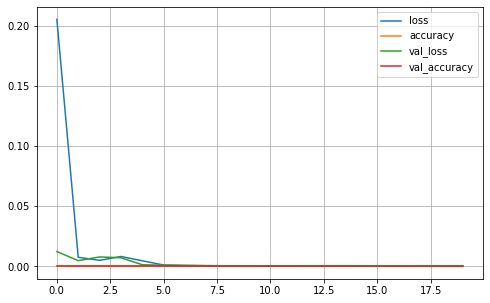

In [43]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)

After training this model, you can predict the next 10 values at once very easily:

In [46]:
Y_pred = model.predict(X_new)

In [47]:
Y_pred

array([[ 7.4231005, -5.0616627, -4.277355 , -4.058911 , -3.7369657,
        -3.722675 , -4.2259207, -5.151604 , -4.762439 , -3.9166894]],
      dtype=float32)

In [48]:
Y_pred = model.predict(X_new)
Y_pred

array([[ 7.4231005, -5.0616627, -4.277355 , -4.058911 , -3.7369657,
        -3.722675 , -4.2259207, -5.151604 , -4.762439 , -3.9166894]],
      dtype=float32)

we can
train it to forecast the next 10 values at each and every time step. In other words, we
can turn this sequence-to-vector RNN into a sequence-to-sequence RNN. The advantage
of this technique is that the loss will contain a term for the output of the RNN at
each and every time step, not just the output at the last time step. This means there
will be many more error gradients flowing through the model, and they won’t have to
flow only through time; they will also flow from the output of each time step. This
will both stabilize and speed up training.

In [49]:
Y = np.empty((10000, n_steps, 10)) # each target is a sequence of 10D vectors

for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
    
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

### To turn the model into a sequence-to-sequence model, we must set return_sequen ces=True in all recurrent layers (even the last one),

we must apply the output
Dense layer at every time step. Keras offers a TimeDistributed layer for this very purpose:
it wraps any layer (e.g., a Dense layer) and applies it at every time step of its
input sequence. It does this efficiently, by reshaping the inputs so that each time step
is treated as a separate instance (i.e., it reshapes the inputs from [batch size, time steps,
input dimensions] to [batch size × time steps, input dimensions]; in this example, the
number of input dimensions is 20 because the previous SimpleRNN layer has 20 units),
then it runs the Dense layer, and finally it reshapes the outputs back to sequences (i.e.,
it reshapes the outputs from [batch size × time steps, output dimensions] to [batch size,
time steps, output dimensions]; in this example the number of output dimensions is
10, since the Dense layer has 10 units).2 Here is the updated model

In [50]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
    ])

All outputs are needed during training, but only the output at the last time step is
useful for predictions and for evaluation. So although we will rely on the MSE over all
the outputs for training, we will use a custom metric for evaluation, to only compute
the MSE over the output at the last time step:

In [51]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [52]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

In [53]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
  32/7000 [..............................] - ETA: 4:06

InvalidArgumentError:  Incompatible shapes: [32,1] vs. [32,50,10]
	 [[node loss/time_distributed_loss/SquaredDifference (defined at <ipython-input-53-fa4d77e851f8>:1) ]] [Op:__inference_distributed_function_137410]

Function call stack:
distributed_function
